In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
complaints = pd.read_csv('complaints.csv')
complaints

,Consumer complaint narrative,Issue
0,My name is XXXX XXXX this complaint is not mad...,Incorrect information on your report
1,I searched on XXXX for XXXXXXXX XXXX and was ...,Fraud or scam
2,I have a particular account that is stating th...,Incorrect information on your report
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report
...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed
353430,"My Father, a XXXX XXXX acquired an HECM rever...",Struggling to pay mortgage


In [4]:
complaints['Issue'].value_counts()

Incorrect information on your report    229305
Attempts to collect debt not owed        73163
Communication tactics                    21243
Struggling to pay mortgage               17374
Fraud or scam                            12347
Name: Issue, dtype: int64

In [5]:
complaints_no_x=complaints

In [6]:
complaints_no_x['Consumer complaint narrative'] = complaints_no_x['Consumer complaint narrative'].apply(lambda x: re.sub(r'XX', '', x))
complaints_no_x

,Consumer complaint narrative,Issue
0,My name is this complaint is not made in err...,Incorrect information on your report
1,I searched on for and was pointed to a web...,Fraud or scam
2,I have a particular account that is stating th...,Incorrect information on your report
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report
...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed
353430,"My Father, a acquired an HECM reverse mortg...",Struggling to pay mortgage


In [7]:
complaints_no_x['Consumer complaint narrative'] = complaints_no_x['Consumer complaint narrative'].apply(lambda x: re.sub(r'//', '', x))

In [14]:
complaints_no_x['Consumer complaint narrative'][1]

"I searched on  for    and was pointed to a website I legitimately believed was . The website was  whereas the authentic website is  I proceeded to buy a gun from the fraudulent website and sent my money via  as the spam seller requested, this was a total of {$450.00} on . I received an email stating the transaction was approved and on  I attempted to reach back out to the company in an attempt to give them the contact info of my chosen  dealer, the emails started to bounce back ( there are also photos of this ). This was when I realized that this website was a faked, copycat website. I attempted to report it to my bank immediately when I realized a company I was dealing with was committing fraud and pretending to be a firearms dealer that has been in business for over 80 years and is a very well-known company all over the world. As my bank, I expected them to help protect me. I was told to wait until the money posted and then got a letter stating that because I initiated the transacti

In [8]:
docs = complaints_no_x['Consumer complaint narrative']
y = complaints_no_x['Issue']

In [9]:
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.dimensionality import BaseDimensionalityReduction
from sklearn.linear_model import LogisticRegression

# Skip over dimensionality reduction, replace cluster model with classifier,
# and reduce frequent words while we are at it.
empty_dimensionality_model = BaseDimensionalityReduction()
clf = LogisticRegression()
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Create a fully supervised BERTopic instance
topic_model= BERTopic(
        umap_model=empty_dimensionality_model,
        hdbscan_model=clf,
        ctfidf_model=ctfidf_model
)
topics, probs = topic_model.fit_transform(docs, y=y)

2023-05-06 17:54:03.079457: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 18>:18                                                                            │
│                                                                                                  │
│   15 │   │   hdbscan_model=clf,                                                                  │
│   16 │   │   ctfidf_model=ctfidf_model                                                           │
│   17 )                                                                                           │
│ ❱ 18 topics, probs = topic_model.fit_transform(docs, y=y)                                        │
│   19                                                                                             │
│                                                                                                  │
│ /opt/anaconda3/lib/python3.9/site-packages/bertopic/_bertopic.py:359 in fit_transform            │
│                                                                                                  │
│    356 │   │   umap_embeddings = self._reduce_dimensionality(embeddings, y)                      │
│    357 │   │                                                                                     │
│    358 │   │   # Cluster reduced embeddings                                                      │
│ ❱  359 │   │   documents, probabilities = self._cluster_embeddings(umap_embeddings, documents,   │
│    360 │   │                                                                                     │
│    361 │   │   # Sort and Map Topic IDs by their frequency                                       │
│    362 │   │   if not self.nr_topics:                                                            │
│                                                                                                  │
│ /opt/anaconda3/lib/python3.9/site-packages/bertopic/_bertopic.py:2912 in _cluster_embeddings     │
│                                                                                                  │
│   2909 │   │   │   except AttributeError:                                                        │
│   2910 │   │   │   │   labels = y                                                                │
│   2911 │   │   │   documents['Topic'] = labels                                                   │
│ ❱ 2912 │   │   │   self._update_topic_size(documents)                                            │
│   2913 │   │                                                                                     │
│   2914 │   │   # Some algorithms have outlier labels (-1) that can be tricky to work             │
│   2915 │   │   # with if you are slicing data based on that labels. Therefore, we                │
│                                                                                                  │
│ /opt/anaconda3/lib/python3.9/site-packages/bertopic/_bertopic.py:3154 in _update_topic_size      │
│                                                                                                  │
│   3151 │   │   """                                                                               │
│   3152 │   │   sizes = documents.groupby(['Topic']).count().sort_values("Document", ascending=F  │
│   3153 │   │   self.topic_sizes_ = dict(zip(sizes.Topic, sizes.Document))                        │
│ ❱ 3154 │   │   self.topics_ = documents.Topic.astype(int).tolist()                               │
│   3155 │                                                                                         │
│   3156 │   def _extract_words_per_topic(self,                                                    │
│   3157 │   │   │   │   │   │   │   │    words: List[str],                                        │
│                                                                                                  │
│ /opt/anaconda3/lib/python3.9/site-packages/pandas/core/gene

In [15]:
X_train, X_test, y_train, y_test = train_test_split(complaints_no_x['Consumer complaint narrative'], 
                                                    complaints_no_x['Issue'], 
                                                    test_size=0.2, 
                                                    random_state=42) 
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))

                                      precision    recall  f1-score   support

   Attempts to collect debt not owed       0.77      0.64      0.70     14477
               Communication tactics       0.84      0.75      0.79      4160
                       Fraud or scam       0.93      0.84      0.89      2391
Incorrect information on your report       0.89      0.95      0.92     46122
          Struggling to pay mortgage       0.94      0.88      0.91      3537

                            accuracy                           0.87     70687
                           macro avg       0.87      0.81      0.84     70687
                        weighted avg       0.87      0.87      0.87     70687



In [16]:
from io import StringIO
col = ['Consumer complaint narrative', 'Issue']
complaints_no_x = complaints_no_x[col]
complaints_no_x = complaints_no_x[pd.notnull(complaints_no_x['Consumer complaint narrative'])]
complaints_no_x.columns = ['complaints', 'issue']
complaints_no_x['label'] = complaints_no_x['issue'].factorize()[0]
label_df = complaints_no_x[['issue', 'label']].drop_duplicates().sort_values('label')
complaints_no_x

,complaints,issue,label
0,My name is this complaint is not made in err...,Incorrect information on your report,0
1,I searched on for and was pointed to a web...,Fraud or scam,1
2,I have a particular account that is stating th...,Incorrect information on your report,0
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed,2
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report,0
...,...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed,2
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed,2
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed,2
353430,"My Father, a acquired an HECM reverse mortg...",Struggling to pay mortgage,4


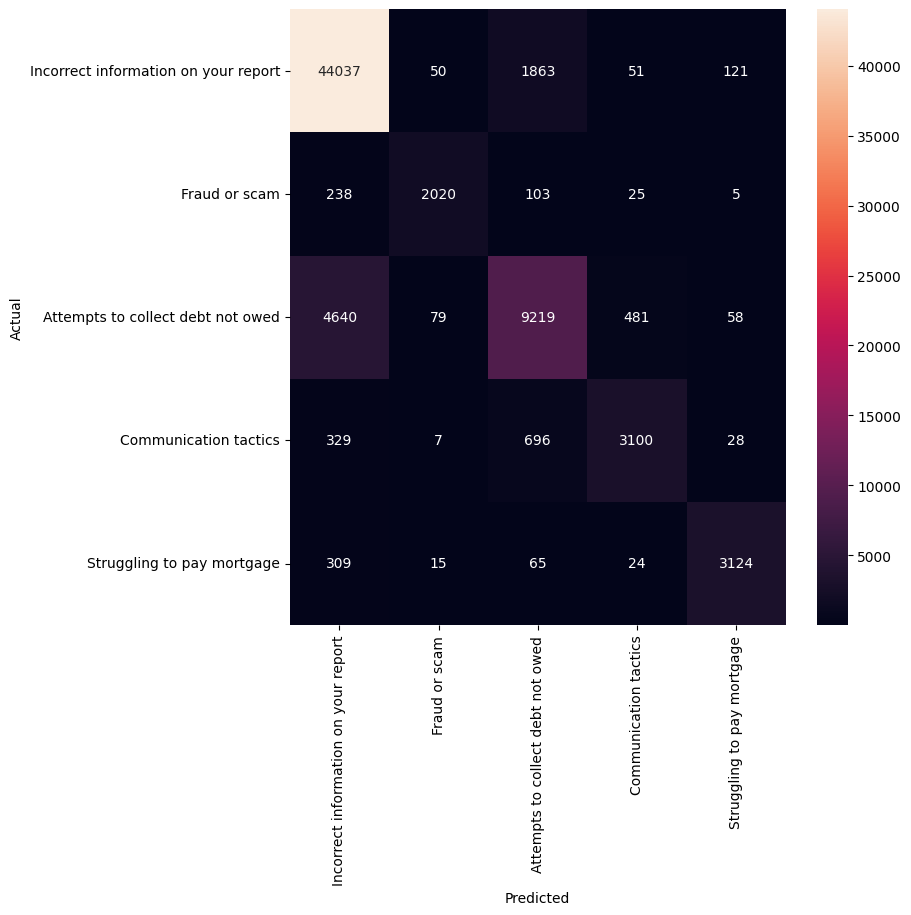

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Set categories of issue column to match label_df
complaints_no_x['issue'] = pd.Categorical(complaints_no_x['issue'], categories=label_df['issue'])

# Factorize issue column
complaints_no_x['label'] = complaints_no_x['issue'].cat.codes

conf_mat = confusion_matrix(y_test, y_pred, labels=label_df['issue'].tolist())

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=label_df.issue.values, yticklabels=label_df.issue.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Rohit's stopword filter
# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['xa', 'nbsp'] + list(string.ascii_lowercase))

def text_preprocessing(text):
    text = BeautifulSoup(text, 'lxml').get_text(separator=' ', strip=True)
    text = re.findall(r'[a-z]+', text.lower())
    text = [word for word in text if word not in stopwords]
    return ' '.join(text)

In [37]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
X = complaints_no_x['complaints']
y = complaints_no_x['issue']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state = 0)
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(2, 3),
                        stop_words='english')
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)
X_test_vec = fitted_vectorizer.transform(X_test)
svc = LinearSVC()
svc.fit(tfidf_vectorizer_vectors, y_train)
y_pred = svc.predict(X_test_vec)
print(classification_report(y_test, y_pred))

                                      precision    recall  f1-score   support

   Attempts to collect debt not owed       0.80      0.74      0.77     18412
               Communication tactics       0.84      0.74      0.78      5257
                       Fraud or scam       0.93      0.84      0.88      3122
Incorrect information on your report       0.92      0.96      0.94     57230
          Struggling to pay mortgage       0.94      0.91      0.93      4337

                            accuracy                           0.89     88358
                           macro avg       0.89      0.84      0.86     88358
                        weighted avg       0.89      0.89      0.89     88358



In [31]:
category_to_id = dict(label_df.values)
id_to_category = dict(label_df[['label', 'issue']].values)

In [40]:
incorrect_info=complaints_no_x[complaints_no_x['issue'] =='Incorrect information on your report']

In [41]:
incorrect_info=complaints_no_x[complaints_no_x['issue'] =='Incorrect information on your report']
collect_debt=complaints_no_x[complaints_no_x['issue'] =='Attempts to collect debt not owed']

In [42]:
collect_debt

,complaints,issue,label
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed,2
6,"By the way, also following Federal Trade Commi...",Attempts to collect debt not owed,2
11,The last time I ever made a payment was 2018. ...,Attempts to collect debt not owed,2
12,"On 2023, I called Convergent Outsourcing and t...",Attempts to collect debt not owed,2
14,"I.C. SYSTEM, INC they said that I owe th...",Attempts to collect debt not owed,2
...,...,...,...
353390,I had an automobile insurance policy with a co...,Attempts to collect debt not owed,2
353411,I am a victim of identity theft. these account...,Attempts to collect debt not owed,2
353427,Collections account I have no knowledge of,Attempts to collect debt not owed,2
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed,2


In [43]:
mask = collect_debt['complaints'].str.len() >=1
collect_debt= collect_debt.loc[mask]
collect_debt['complaints'] = collect_debt['complaints'].astype('str')

In [44]:
docs = collect_debt.complaints.values

In [ ]:
#instantiate BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

#generate the topics
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/2287 [00:00<?, ?it/s]